In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
data = iris.data[:-50, -2:]
tr = iris.target[:-50]
tr_name = iris.target_names
cl = np.array(['red', 'green', 'blue'])
print(tr)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


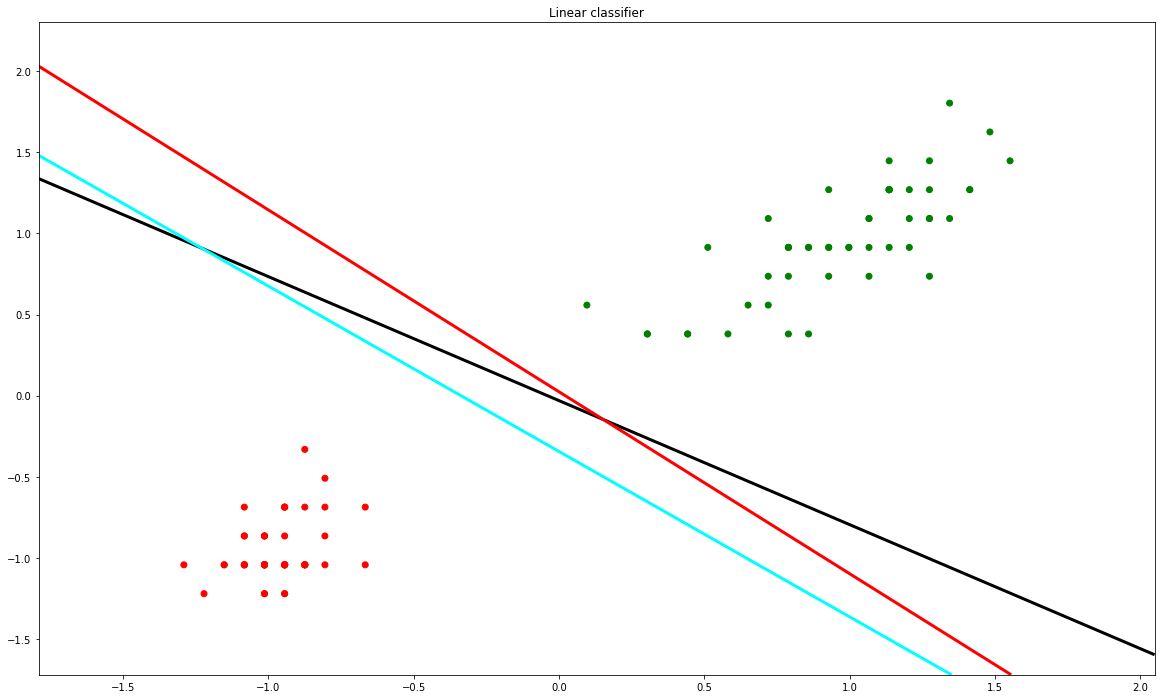

In [6]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.scatter(data[:, 0], data[:, 1], color=cl[tr])
ax.set_title('Linear classifier')

sc = StandardScaler()
sc.fit(data)
data = sc.transform(data)

# ADALINE
clf_1 = SGDClassifier(loss='squared_loss', max_iter=5000, tol=1e-3)
clf_1.fit(data, tr)
# Персептрон
clf_2 = SGDClassifier(loss='perceptron', max_iter=10000, tol=1e-3)
clf_2.fit(data, tr)
# Логистическая регрессия
clf_3 = SGDClassifier(loss='log', max_iter=10000, tol=1e-3)
clf_3.fit(data, tr)

x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
objects = np.c_[xx.ravel(), yy.ravel()]

Z1 = np.array([clf_1.decision_function([obj]) for obj in objects])
Z1 = Z1.reshape(xx.shape)
ax.contour(xx, yy, Z1, [0], linewidths=3, colors='black')

Z2 = np.array([clf_2.decision_function([obj]) for obj in objects])
Z2 = Z2.reshape(xx.shape)
ax.contour(xx, yy, Z2, [0], linewidths=3, colors='red')

Z3 = np.array([clf_3.decision_function([obj]) for obj in objects])
Z3 = Z3.reshape(xx.shape)
ax.contour(xx, yy, Z3, [0], linewidths=3, colors='cyan')

plt.show()